In [1]:
# Start writing code here...
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('word_tokenize')
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
#import contractions
stop_words = stopwords.words('english')
import string
import pandas as pd
! pip install transformers datasets
!pip install --upgrade pip
!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
!pip install pysentimiento
!pip install transformers
!pip install langdetect
from langdetect import detect
from pysentimiento import create_analyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
     |████████████████████████████████| 3.5 MB 30.7 MB/s 
     |████████████████████████████████| 311 kB 88.0 MB/s 
     |████████████████████████████████| 6.8 MB 83.0 MB/s 
     |████████████████████████████████| 895 kB 87.6 MB/s 
     |████████████████████████████████| 67 kB 14.4 MB/s 
     |████████████████████████████████| 128 kB 85.2 MB/s 
   

In [2]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I shall",
"i'll've": "I shall have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she has",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [3]:
#remove stop words from text
def remove_stopwords(token):
  tokens = token.split()
  removed = [word for word in tokens if word not in stop_words]
  return ' '.join(removed)

#remove punctuations
def remove_punch(tokens):
  new_string = tokens.translate(str.maketrans('', '', string.punctuation))
  return new_string

#lemmatize words (runs --> run)
wordnet_lemmatizer = WordNetLemmatizer()
def lem_words(token):
  tokens = token.split()
  lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(lemmatized_word)

#expand contractions in  the sentences (I'll --> I will)
def con(token):
  tokens = token.split()
  for word in tokens:
    if word.lower() in contractions:    
      index = tokens.index(word)
      tokens[index] = contractions[word.lower()]
  return ' '.join(tokens)

def count_words(text):
  words = text.split()
  return len(words)

def langudetect(sent):
    try:
        return detect(sent)
    except:
        return None


In [4]:
#pd3 = pd.read_csv("suicidal1.csv", delimiter='\t', error_bad_lines=False)
pd3=pd.read_csv("raw_data.csv")
pd3 = pd3.drop(columns="Unnamed: 0")
#pd1.isnull().sum()
#pd3=pd1.append(pd2)
#pd3.isnull().sum()
pd3.dropna(inplace=True)
#drop rows containing "Replying to"
pd3 = pd3[~pd3['Text1'].str.contains("Replying")]
#detect language to drop columns other than english

pd3['Text1']=pd3['Text1'].apply(remove_stopwords)
pd3['Text1']=pd3['Text1'].apply(remove_punch)
pd3['Text1']=pd3['Text1'].apply(lem_words)
pd3['Text1']=pd3['Text1'].apply(con)

pd3['lang'] = pd3['Text1'].apply(langudetect)
#pd3 = pd3[pd3['lang']=='en']

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="en")
pd3['hate?'] = pd3['Text1'].apply(hate_speech_analyzer.predict)
pd3['score'] = pd3['hate?'].apply(lambda x: max(x.probas['hateful'], x.probas['targeted'],x.probas['aggressive']))

df = pd3.groupby("Text").mean("score")
def ifhate(score):
    if score>0.5:
        return 1
    if score<=0.5:
        return 0
# hateful = 1, not_hateful=0
df['label'] = df['score'].apply(ifhate)
pd3.to_csv("clean_final.csv")
df.to_csv("score_final.csv")

Downloading:   0%|          | 0.00/335 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/980 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [10]:
!pip install wordcloud==1.8.1
!pip install emoji==1.6.3
!pip install spacy_fastlang==1.0.1


In [11]:
from wordcloud import WordCloud, STOPWORDS
import string 
import emoji
import re
import pandas as pd
import spacy as sp
from spacy.language import Language
from spacy_fastlang import LanguageDetector
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

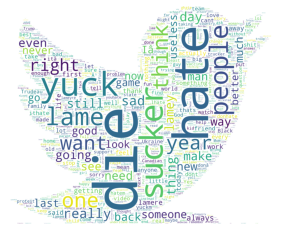

<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
df = pd.read_csv(r"clean_final.csv")
text = open(r"vcleaned.csv", encoding='latin-1').read()

wordcloud = WordCloud().generate(text)
mask = np.array(Image.open('twitter_mask.png'))
more_stopwords = {'oh', 'will', 'hey', 'yet','say','Ã','tdiee','got','â','u'}
STOPWORDS = STOPWORDS.union(more_stopwords)
wordcloud = WordCloud(
                      
                      collocations=False,
                      max_words=3000,
                      background_color="white", 
                      width = 1800, height = 1400, 
                      mask=mask,
                      stopwords=STOPWORDS,
                      ).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(20,20))
plt.show()
plt.savefig('./my_twitter_wordcloud_2.png', dpi=300)

In [13]:
df_hm= pd.read_csv(r"score_final.csv")

In [14]:
df_hm

,Text,score,label
0,????????�?? ??????????�??,0.009233,0
1,Berner Lenny,0.005527,0
2,Cheyenne,0.005902,0
3,LetsGoBrandon!,0.095218,0
4,Tekki the Fairy,0.010765,0
...,...,...,...
1121,𝘼𝙎𝙃𝙀𝙍,0.010561,0
1122,𝙤𝙬𝙚𝙣,0.347083,0
1123,𝙰𝚕𝚘𝚗𝚎 𝚊𝚝 𝙽𝚒𝚐𝚑𝚝,0.010235,0
1124,🅲🅴🅽🆃🅴🆁-🆁🅸🅶🅷🆃,0.008924,0


In [20]:
_deepnote_run_altair(df_hm, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"score","type":"quantitative","sort":null,"scale":{"type":"log","zero":false},"axis":{"grid":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true},"axis":{"grid":false}},"color":{"field":"score","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32908162-355b-46be-ab4a-9dfe9f21bcf8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>